In [1]:
#Load all required packages

import numpy as np #The holy grail of scientific computing!
import matplotlib.pyplot as plt #The only reason I can call myself an "artist"

In [2]:
import matplotlib as mpl
mpl.rcParams['xtick.direction'], mpl.rcParams['ytick.direction'] = 'in', 'in'
mpl.rcParams['xtick.major.size'], mpl.rcParams['xtick.minor.size'] = 14, 8
mpl.rcParams['xtick.major.width'], mpl.rcParams['xtick.minor.width'] = 1.2, 0.8
mpl.rcParams['xtick.major.pad'], mpl.rcParams['xtick.minor.pad'] = 10, 10
mpl.rcParams['ytick.major.size'], mpl.rcParams['ytick.minor.size'] = 14, 8
mpl.rcParams['ytick.major.width'], mpl.rcParams['ytick.minor.width'] = 1.2, 0.8

In [1]:
def Omega_X(a, Omega_0, w):
    '''
    Computes the fraction of energy in the Universe due to a component X.
    
    Input
    --------
    a: numpy array
        All the values of the scale factor, a, at which we compute Omega_X
        
    Omega_0: float
        The value of Omega_X at present (a = 1)
        
    w: float, int, or function of a 
        The equation of state w = pressure/energy of the component X.
        In this project, we make it a function of scale factor a
        
    Output
    --------
    
    numpy array:
        The value of Omega_X at all values in the array a    
    '''
    
    #Initialize numpy array to store our output
    factor = np.zeros(a.size)

    #Iterate/loop over all input values of a
    for i, a_now in enumerate(a):

        #For each a_now, create an array of values from a = a_now to a = 1
        present_epoch_to_a_now = np.geomspace(a_now, 1, 1000, endpoint=True)

        #Integrate
        factor[i] = np.exp(3*np.trapz(1/present_epoch_to_a_now*(1 + w(present_epoch_to_a_now)), present_epoch_to_a_now))
        
    return Omega_0*factor

In [4]:
def Hubble(list_of_Omegas):

    H0 = 70 #Fiducial value of hubble constant in km/s/Mpc

    return H0*np.sqrt(np.sum(list_of_Omegas, axis = 0))

# Regular Universe

No handles with labels found to put in legend.


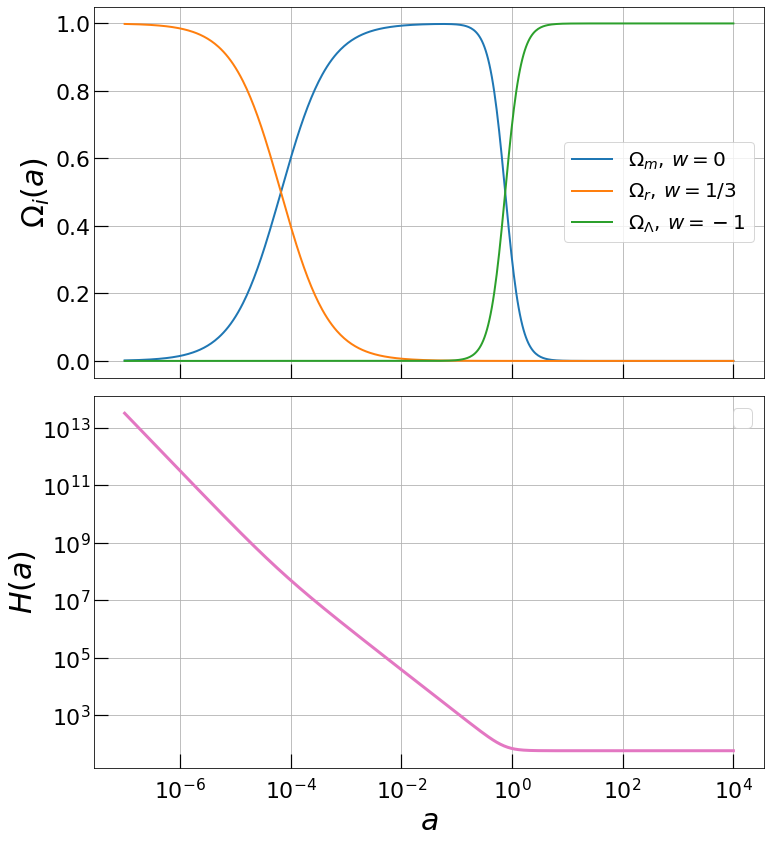

In [15]:
a = np.geomspace(1e-7,1e4, 500, endpoint=True)

Omega_M = Omega_X(a, 0.3,  lambda x: 0)
Omega_R = Omega_X(a, 2e-5,  lambda x: 1/3)
Omega_L = Omega_X(a, 0.7,  lambda x: -1)

Normalize = (Omega_M + Omega_R + Omega_L)

plt.rc('xtick',labelsize=22)
plt.rc('ytick',labelsize=22)

fig, axes = plt.subplots(2, 1, figsize = (12,14), sharex=True)
plt.subplots_adjust(hspace = 0.05)
axes[1].set_yscale('log')
[ax.set_xscale('log') for ax in axes]

axes[0].plot(a, Omega_M/Normalize, lw = 2, label = r'$\Omega_m,\, w = 0$')
axes[0].plot(a, Omega_R/Normalize, lw = 2, label = r'$\Omega_r,\, w = 1/3$')
axes[0].plot(a, Omega_L/Normalize, lw = 2, label = r'$\Omega_\Lambda,\, w = -1$')

axes[0].legend(fontsize = 20)
axes[0].set_ylabel(r'$\Omega_i(a)$', size = 30)
axes[0].grid()


list_of_Omegas = np.array([Omega_M, Omega_R, Omega_L])
axes[1].plot(a, Hubble(list_of_Omegas), lw = 3, alpha = 1, color = 'C6')

axes[1].legend(fontsize = 24)
axes[1].set_ylabel(r'$H(a)$', size = 30)
axes[1].set_xlabel(r'$a$', size = 30)
axes[1].grid()

plt.savefig('Plots/Regular_Universe.pdf', dpi = 400, bbox_layout = 'tight')

# Evolving DE

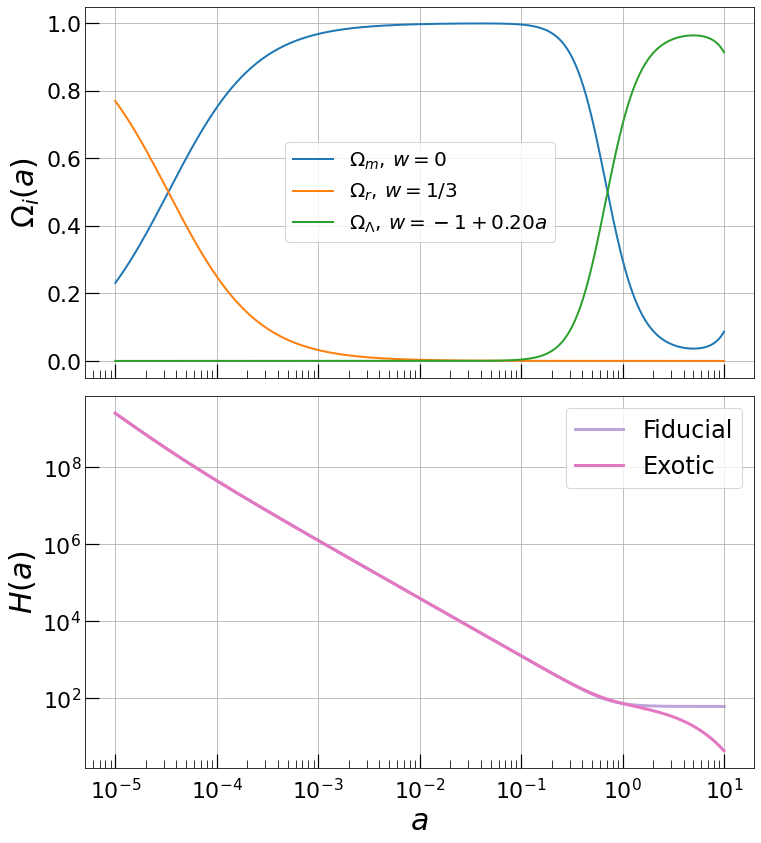

In [26]:
a = np.geomspace(1e-5,10, 500, endpoint=True)

w_0 = -1
w_a = 0.2

Omega_M = Omega_X(a, 0.3,  lambda x: 0)
Omega_R = Omega_X(a, 1e-5, lambda x: 1/3)
Omega_L = Omega_X(a, 0.7,  lambda x: w_0 + w_a*x)


Normalize = (Omega_M + Omega_R + Omega_L)

plt.rc('xtick',labelsize=22)
plt.rc('ytick',labelsize=22)

fig, axes = plt.subplots(2, 1, figsize = (12,14), sharex=True)
plt.subplots_adjust(hspace = 0.05)
axes[1].set_yscale('log')
[ax.set_xscale('log') for ax in axes]

axes[0].plot(a, Omega_M/Normalize, lw = 2, label = r'$\Omega_m,\, w = 0$')
axes[0].plot(a, Omega_R/Normalize, lw = 2, label = r'$\Omega_r,\, w = 1/3$')
axes[0].plot(a, Omega_L/Normalize, lw = 2, label = r'$\Omega_\Lambda,\, w = ' + str(w_0) + '+%.2f'%(w_a) + 'a$')

axes[0].legend(fontsize = 20)
axes[0].set_ylabel(r'$\Omega_i(a)$', size = 30)
axes[0].grid()

Omega_M = Omega_X(a, 0.3,  lambda x: 0)
Omega_R = Omega_X(a, 1e-5, lambda x: 1/3)
Omega_L = Omega_X(a, 0.7,  lambda x: -1)


list_of_Omegas = np.array([Omega_M, Omega_R, Omega_L])
axes[1].plot(a, Hubble(list_of_Omegas), lw = 3, label = r'Fiducial', alpha = 0.6, color = 'C4')

Omega_M = Omega_X(a, 0.3,  lambda x: 0)
Omega_R = Omega_X(a, 1e-5, lambda x: 1/3)
Omega_L = Omega_X(a, 0.7,  lambda x: w_0 + w_a*x)

list_of_Omegas = np.array([Omega_M, Omega_R, Omega_L])
axes[1].plot(a, Hubble(list_of_Omegas), lw = 3, label = r'Exotic', color = 'C6')

axes[1].legend(fontsize = 24)
axes[1].set_ylabel(r'$H(a)$', size = 30)
axes[1].set_xlabel(r'$a$', size = 30)
axes[1].grid()

# Stalling Car Universe

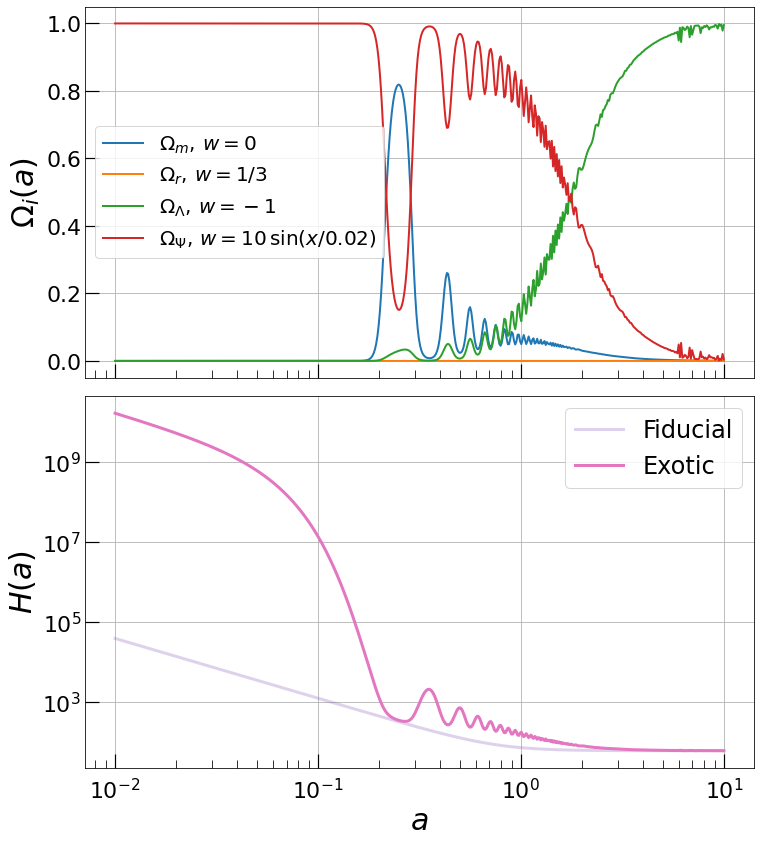

In [25]:
a = np.geomspace(1e-2,10, 500, endpoint=True)

Omega_M = Omega_X(a, 0.3,  lambda x: 0)
Omega_R = Omega_X(a, 1e-5, lambda x: 1/3)
Omega_L = Omega_X(a, 0.7,  lambda x: -1)

x_scale = 2e-2
A = 10
Omega_P = Omega_X(a, 5e-0, lambda x: A*np.sin(x**2/x_scale))

Normalize = (Omega_M + Omega_R + Omega_L + Omega_P)

plt.rc('xtick',labelsize=22)
plt.rc('ytick',labelsize=22)

fig, axes = plt.subplots(2, 1, figsize = (12,14), sharex=True)
plt.subplots_adjust(hspace = 0.05)
axes[1].set_yscale('log')
[ax.set_xscale('log') for ax in axes]

axes[0].plot(a, Omega_M/Normalize, lw = 2, label = r'$\Omega_m,\, w = 0$')
axes[0].plot(a, Omega_R/Normalize, lw = 2, label = r'$\Omega_r,\, w = 1/3$')
axes[0].plot(a, Omega_L/Normalize, lw = 2, label = r'$\Omega_\Lambda,\, w = -1$')
axes[0].plot(a, Omega_P/Normalize, lw = 2, label = r'$\Omega_\Psi,\, w = ' + str(A) + '\,\sin(x/' + str(x_scale) + ')$')

axes[0].legend(fontsize = 20)
axes[0].set_ylabel(r'$\Omega_i(a)$', size = 30)
axes[0].grid()


list_of_Omegas = np.array([Omega_M, Omega_R, Omega_L])
axes[1].plot(a, Hubble(list_of_Omegas), lw = 3, label = r'Fiducial', alpha = 0.3, color = 'C4')

list_of_Omegas = np.array([Omega_M, Omega_R, Omega_L, Omega_P])
axes[1].plot(a, Hubble(list_of_Omegas), lw = 3, label = r'Exotic', color = 'C6')

axes[1].legend(fontsize = 24)
axes[1].set_ylabel(r'$H(a)$', size = 30)
axes[1].set_xlabel(r'$a$', size = 30)
axes[1].grid()

# plt.savefig('Plots/Stalled_Car_Universe.pdf', dpi = 400, bbox_layout = 'tight')

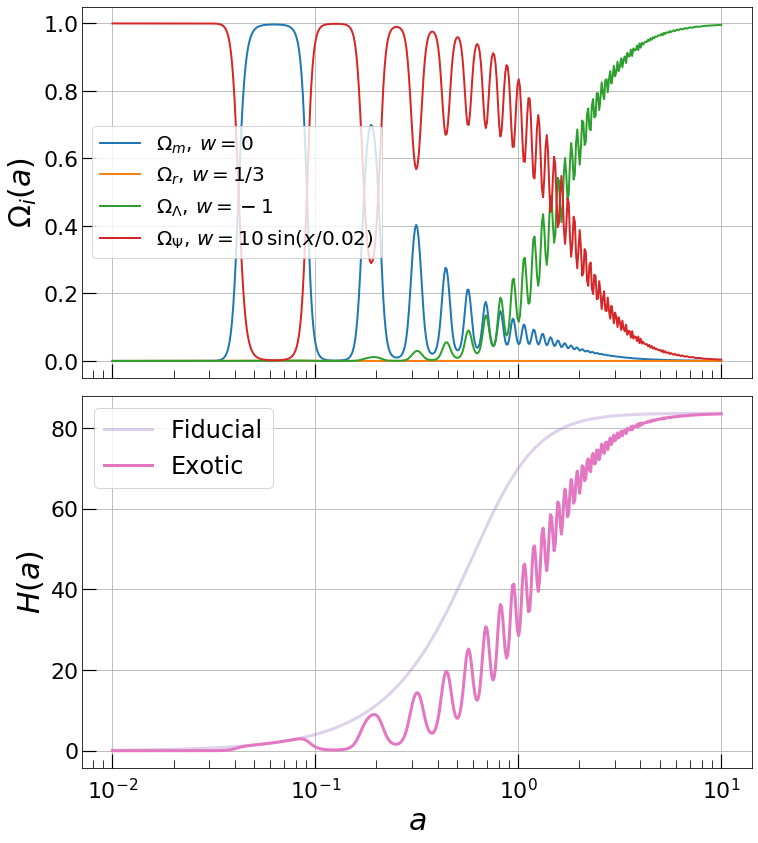

In [244]:
a = np.geomspace(1e-2,10, 500, endpoint=True)

Omega_M = Omega_X(a, 0.3,  lambda x: 0)
Omega_R = Omega_X(a, 1e-5, lambda x: 1/3)
Omega_L = Omega_X(a, 0.7,  lambda x: -1)

x_scale = 2e-2
A = 10
Omega_P = Omega_X(a, 5e-0, lambda x: A*np.sin(x/x_scale))

Normalize = (Omega_M + Omega_R + Omega_L + Omega_P)

plt.rc('xtick',labelsize=22)
plt.rc('ytick',labelsize=22)

fig, axes = plt.subplots(2, 1, figsize = (12,14), sharex=True)
plt.subplots_adjust(hspace = 0.05)
# axes[1].set_yscale('log')
[ax.set_xscale('log') for ax in axes]

axes[0].plot(a, Omega_M/Normalize, lw = 2, label = r'$\Omega_m,\, w = 0$')
axes[0].plot(a, Omega_R/Normalize, lw = 2, label = r'$\Omega_r,\, w = 1/3$')
axes[0].plot(a, Omega_L/Normalize, lw = 2, label = r'$\Omega_\Lambda,\, w = -1$')
axes[0].plot(a, Omega_P/Normalize, lw = 2, label = r'$\Omega_\Psi,\, w = ' + str(A) + '\,\sin(x/' + str(x_scale) + ')$')

axes[0].legend(fontsize = 20)
axes[0].set_ylabel(r'$\Omega_i(a)$', size = 30)
axes[0].grid()


list_of_Omegas = np.array([Omega_M, Omega_R, Omega_L])
axes[1].plot(a, Hubble(list_of_Omegas), lw = 3, label = r'Fiducial', alpha = 0.3, color = 'C4')

list_of_Omegas = np.array([Omega_M, Omega_R, Omega_L, Omega_P])
axes[1].plot(a, Hubble(list_of_Omegas), lw = 3, label = r'Exotic', color = 'C6')

axes[1].legend(fontsize = 24)
axes[1].set_ylabel(r'$H(a)$', size = 30)
axes[1].set_xlabel(r'$a$', size = 30)
axes[1].grid()

plt.savefig('Plots/Stalled_Car_Universe.pdf', dpi = 400, bbox_layout = 'tight')